# Clean & Analyze Social Media

**Introduction**

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

**Project Scope**

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Task 1: Required libraries & their purpose

To do the analysis, we'll gather and import the following libraries:

* `pandas` for creating the dataframe, grouping and analysis
* `numpy` for forming random reproducible numbers from a range and choosing values from a list with different probabilities
* `Matplotlib.pyplot` for displaying graphs and tweaking the plots
* `seaborn` for plotting the data

**Resources:**
* _https://seaborn.pydata.org/installing.html#quickstart_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 2: Generate random but realistic Twitter data

We'll now generate some random tweet data to analyze.

Let's use `pandas`' `date_range()` method to choose a pseudo-random date within a range, the `numpy` module’s `choice` to create a choice from a list with varying probabilities, and `numpy`’s `random.lognormal` to create random numbers that are distributed similar to a log-normal distribution (skewed, right long tail, similar to the number of likes social media posts get).

First of all we'll need to define a list of categories for the social media experiment. The list includes the following categories:

* _Food_
* _Travel_
* _Fashion_
* _Fitness_
* _Music_
* _Culture_
* _Family_
* _Health_

Next, we'll generate a Python dictionary filled with random data (values) and the following fields (keys):

* `Date`: The date on which the tweet was created
* `Category`: The main subject (category) of the tweet
* `Likes`: The number of likes the tweet has received

The data needs to align, so the _Date_ dictionary-entry should be _n_ periods long, The _Category_ should be a _list_ of random choices _n_ entries long (8 possible choices), and the _Likes_ category should be random integers in the range _0_ to _5000_ (representing number of likes for each single tweet) also with size equal to _n_.

**Resources:**
* _https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html_
* _https://www.w3schools.com/python/ref_random_choice.asp_
* _https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html_

### Number of tweets to analyze
Let's simulate and analyze a gigangtic 1 million tweets (n = 1000000)!

In [2]:
no_of_tweets = 10**6

In order to set the "_seed_" of the random generator in `numpy` to a set number so we can reproduce the random integers later, it is best practice to use the `np.random.default_rng(seed)` method. Then we can use the `.integers(low, high, size)` method, in order to produce the same exact random numbers in the future when we re-run the code.

### Number & distribution of likes per tweet
**`likes`:** We need to generate random integers between 0 adn 5000 (number of likes) with a heavy skew and long-tail to the right (log-normal):

In [3]:
# For reproducibility, so that we get the same (random) numbers when running the code later
rng = np.random.default_rng(seed=1234)

# Chosen mean (mu) and standard deviation (sigma) of the (log-normal) distribution
mu, sigma = 15, 0.75 

# Generate a random log-normal distribution:
raw_likes = rng.lognormal(mu, sigma, no_of_tweets) #gives a reproducible numpy array with 1,000,000 random numbers

# Scaling and making sure the values (# of likes received for each tweet (or data row)) is between 0 and 5,000:
scaled_likes = raw_likes / raw_likes.max() * 5000

# Finally rounding the numbers and converting to integers to ensure they are integers within the 0 - 5000 range:
likes = np.round(scaled_likes).astype(int)

print(f"The length of `likes`: {len(likes)}")
likes

The length of `likes`: 1000000


array([ 43, 149, 248, ...,  99, 208, 124])

### Dates of the tweets
**`date`**: We need 1 million date entries between January 1st and December 31st 2023. To do so, we'll simply use `pandas`' `pd.date_range()` funcion:

In [4]:
date = pd.date_range(start='2023-01-01', end='2023-12-31', periods=no_of_tweets)

### Category of each tweet
**`category`**: We need 1 million random category types (from the `categories` list). For this, we'll set up different probabilities (`p`) for each of these category types. The reason is, we do not want to have the same probability across all category types. This is also not the case in a real-world scenario. Since we need a lot of entries, it's best to use a `numpy.random.choice()` array instead of `random.choice()`, that creates a slow `list`:

In [5]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

#we again use the numpy `rng` random variable above that we set a seed for to reproduce the values later too:
category = rng.choice(categories, size=no_of_tweets, p=[0.05, 0.25, 0.15, 0.25, 0.1, 0.025, 0.1, 0.075])  # sum(p) = 100%

### Wrapping Twitter data in a dictionary

In [6]:
twitter_data = {'Date': date, 'Category': category, 'Likes': likes}

## Task 3: Loading & exploring the data

In the next step we'll load the randomly generated data into a `pandas`' dataframe (`pd.DataFrame()`). Afterwards we'll explore the the dataframe information (`df.info()`) and the dataframe description (`df.describe()`). Finally, we'll check the count of each _Category_ element.

**Resources:**
* _https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html_
* _https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html_
* _https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html_

In [7]:
df = pd.DataFrame(data=twitter_data)
df #dataframe with a million rows!

,Date,Category,Likes
0,2023-01-01 00:00:00.000000000,Culture,43
1,2023-01-01 00:00:31.449631449,Family,149
2,2023-01-01 00:01:02.899262899,Music,248
3,2023-01-01 00:01:34.348894348,Fitness,159
4,2023-01-01 00:02:05.798525798,Family,272
...,...,...,...
999995,2023-12-30 23:57:54.201474204,Family,194
999996,2023-12-30 23:58:25.651105652,Music,298
999997,2023-12-30 23:58:57.100737100,Fitness,99
999998,2023-12-30 23:59:28.550368552,Family,208


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Date      1000000 non-null  datetime64[ns]
 1   Category  1000000 non-null  object        
 2   Likes     1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.9+ MB


In [9]:
df.describe(include=np.number)

,Likes
count,1000000.000000
mean,188.297463
std,162.876118
min,4.000000
25%,86.000000
50%,142.000000
75%,236.000000
max,5000.000000


In [10]:
df.Category.unique()

array(['Culture', 'Family', 'Music', 'Fitness', 'Travel', 'Fashion',
       'Health', 'Food'], dtype=object)

## Task 4: Cleaning the data

We'll use `pandas`' built-in functionality to clean the data. First, we'll remove all the null data using the appropriate dataframe drop method. Next, we'd want to also remove duplicate data from the dataframe, with the help of a dataframe method.

To appropriately display the date information, we'll convert the date column to a datetime format using the `pd.to_datetime()` function from Pandas, which is basically a "conversion method".

Finally, we'll convert the dataframe _Likes_ data (column) to an integer.

                              
**Resources:**
* _https://www.w3schools.com/python/pandas/pandas_cleaning.asp_
* _https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html_

The `Date` field contains redundant _time_ information. Let's remove that:

In [11]:
#we use normalize to remove the time portion AND keep Dtype as datetime!
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()

print('Data type for the Date column is unchanged:', df.Date.dtype) #
df#.head()

Data type for the Date column is unchanged: datetime64[ns]


,Date,Category,Likes
0,2023-01-01,Culture,43
1,2023-01-01,Family,149
2,2023-01-01,Music,248
3,2023-01-01,Fitness,159
4,2023-01-01,Family,272
...,...,...,...
999995,2023-12-30,Family,194
999996,2023-12-30,Music,298
999997,2023-12-30,Fitness,99
999998,2023-12-30,Family,208


## Task 5: Visualizing & analyzing the data

First we visually observe relationships among the data using charts and graphs, then we'll perform statistics on it to analyze the data (e.g. compute the average).

We'll visualize the data using the `seaborn` module in a histogram plot of the _Likes_. This is done by the method 
`sns.histplot()`, passing in the `df` field _Likes_ (`df['Likes']`).

Afterwards, let's create a boxplot with the _x_ axis as _Category_, and the _y_ axis as _Likes_.

We'll then go ahead and perform some statistics on the data. First, we'll investiage the _mean_ of the _Likes_ catregory. Next, we'll use the `df.groupby()` method to print out the mean of each Category _Likes_.

**Resources:**
* _https://seaborn.pydata.org/generated/seaborn.boxplot.html_
* _https://seaborn.pydata.org/generated/seaborn.histplot.html_
* _https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html_

<Axes: title={'center': 'Histogram of frequency of number of likes received'}, xlabel='Number of likes per tweet', ylabel='Frequency (number) of tweets with the given number of likes'>

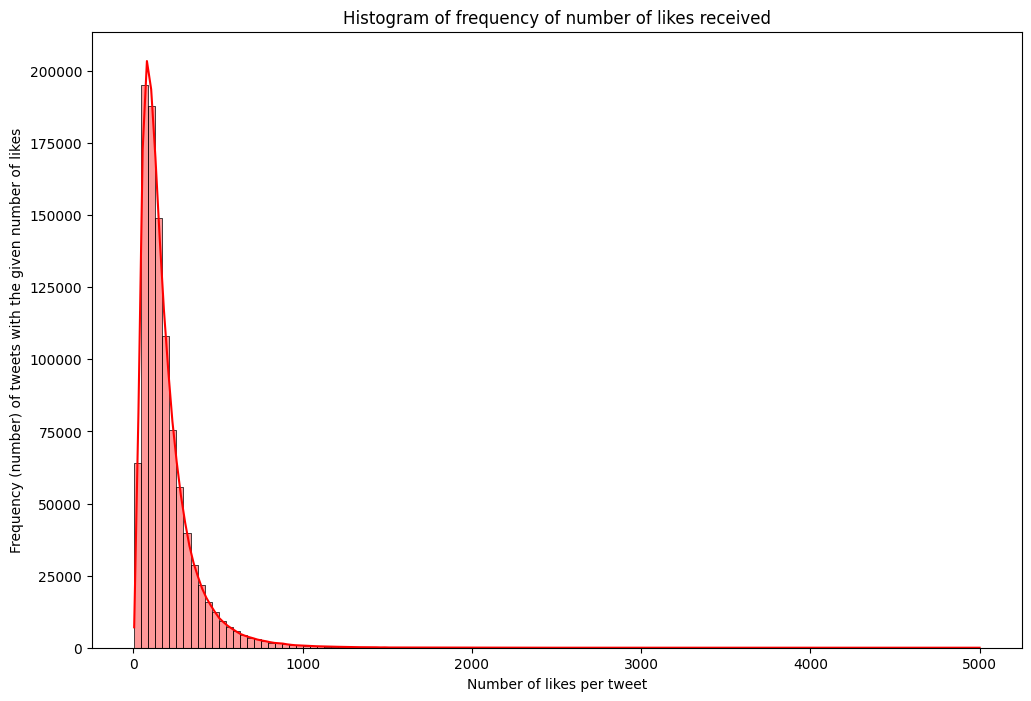

In [12]:
plt.figure(figsize=(12,8))
plt.title('Histogram of frequency of number of likes received')
plt.xlabel('Number of likes per tweet')
plt.ylabel('Frequency (number) of tweets with the given number of likes')

sns.histplot(data=df.Likes, kde=True, bins=120, color='red', alpha=0.4)

#we can clearly see the log-normal heavily skewed distribution (since we generated the data this way), since on social media, most posts/tweets get only a handful of likes, while very few go viral.

We can see below in the boxplot, that the number of likes per tweet is more or less similar across all categories. The _Travel_ category has higher number of outliers that are away from the mean and the only category with a tweet of 5000 likes.

<Axes: xlabel='Category', ylabel='Number of likes per tweet'>

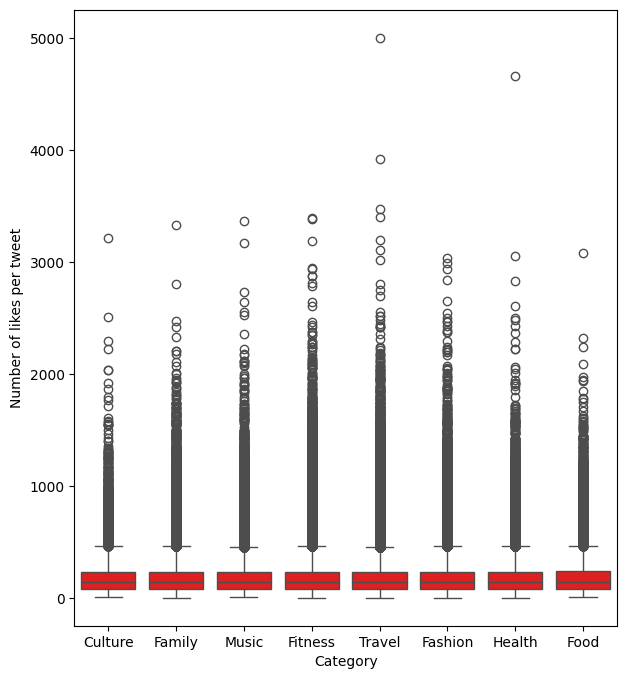

In [13]:
plt.figure(figsize=(7, 8))
plt.ylabel('Number of likes per tweet')

sns.boxplot(x=df.Category, y=df.Likes, color='red')

* Highest number of likes for a tweet was **5000**, posted on Aug. 8, 2023 with the _Travel_ topic.
* Lowest number of likes for a tweet was **4**, that was tweeted on 30th April, 2023 from the _Fitness_ category.

In [14]:
display(df[df.Likes == min(df.Likes)])
display(df[df.Likes == max(df.Likes)])

,Date,Category,Likes
593675,2023-08-05,Fitness,4


,Date,Category,Likes
326968,2023-04-30,Travel,5000


Average number of likes per tweet is similar across all categories:

In [15]:
# Average number of likes received per tweet in each category:
ave_likes_by_cat = df[['Likes','Category']].groupby('Category').mean()
ave_likes_by_cat = ave_likes_by_cat.astype('int32').sort_values(by='Likes', ascending=False) #round the means
ave_likes_by_cat.rename(columns={'Likes': 'Average no. of likes/tweet'}, inplace=True) #rename the column label

ave_likes_by_cat

,Average no. of likes/tweet
Category,
Food,189
Family,188
Fashion,188
Fitness,188
Health,188
Culture,187
Music,187
Travel,187


Number of tweets posted is also the same across the year:

In [16]:
# Number of tweets per month
no_tweet_by_mont = df[['Likes']].groupby(df['Date'].dt.month).count()

no_tweet_by_mont.rename(columns={'Likes': 'No. of tweets/month'}, inplace=True) #renaming the column name
no_tweet_by_mont.rename_axis('Month', inplace=True) #renaming the name of the "group-by" column (Date) which is now the index

no_tweet_by_mont.T

Month,1,2,3,4,5,6,7,8,9,10,11,12
No. of tweets/month,85165,76923,85165,82417,85165,82418,85164,85165,82418,85164,82418,82418


However, there are huge discrepancies across the number of tweets for each category:

In [17]:
# Number of tweets per category
no_tweet_by_cat = df.groupby('Category')[['Likes']].count()

no_tweet_by_cat.sort_values(by='Likes', ascending=False, inplace=True)
no_tweet_by_cat.rename(columns={'Likes': 'No. of tweets/category'}, inplace=True)
no_tweet_by_cat.reset_index(inplace=True)

no_tweet_by_cat

,Category,No. of tweets/category
0,Travel,249694
1,Fitness,249426
2,Fashion,150021
3,Family,100715
4,Music,99879
5,Health,75290
6,Food,50037
7,Culture,24938


We can plot this discrepancy below:

[<BarContainer object of 8 artists>]


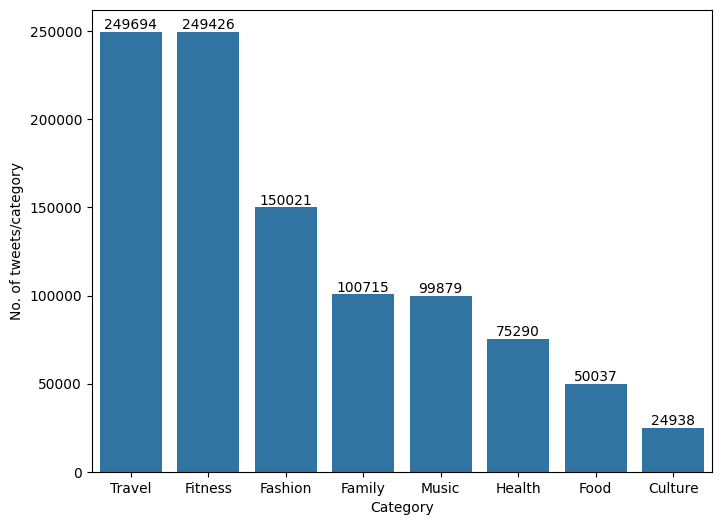

In [18]:
plt.figure(figsize=(8,6))

ax = sns.barplot(data=no_tweet_by_cat,
                 x='Category',
                 y='No. of tweets/category')

# The following line is for demonstration purposes that shows a list that contains 8 "artists", in our case 8 different type of Category. Under the hood, Matplotlib creates a BarContainer object that contains all the bars (represented as 8 Rectangle objects) of the plot. This container is then added to the ax.containers list:
print(ax.containers)

# This lines adds the y-axis values on top of each bar. It uses the bar objects from the containers above
ax.bar_label(ax.containers[0])

plt.show()

## Task 6: Conclusions

Let's conclude and summarize the process and key findings.

---

_**Tips for the final step of the project:**_

_This is your opportunity to impress your prospective employer with your critical thinking and problem-solving skills:_

* _Discuss the process you followed and share your struggles and how you overcame them. What do you think sets your portfolio project apart from those of other candidates?_
  
* _You may even want to offer ideas for improving the design for future business endeavors._

* _Prepare the project artifacts for uploading into your portfolio. You should include:_
    1. _An image file of your Graphs and Statistics with the fields and data displayed._
    2. _Excerpts from your code explaining the purpose of the code._
    3. _Any improvements/changes you would make to the application._

---

In [24]:
twitter_sentiment_df = pd.read_csv('/Users/arya/Documents/My Downloads/training.1600000.processed.noemoticon.csv',
                                   encoding='ISO-8859-1',
                                   names=["target", "ids", "date", "flag", "user", "text"])

In [33]:
twitter_sentiment_df[twitter_sentiment_df.target==0]

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
799995,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799996,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799997,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799998,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...
